Назарчук Олексій Васильович

# Лінійна регресія

У цьому домашньому завданні ми працюємо з набором даних про рівень щастя у країнах за 2019 рік. Він доступний в кабінеті або можна завантажити з Kaggle [змагання](https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv).

Усі імпорти розміщуємо зверху, під цією секцією.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

1. Зчитайте дані за допомогою pandas у змінну `df`.

In [2]:
df = pd.read_csv("/Users/darina/Desktop/NULES/2019.csv")

print(df.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

2. Виведіть діаграму розсіювання ознак `Score` та `GDP per capita`, використовуючи метод `regplot()` з `seaborn`.

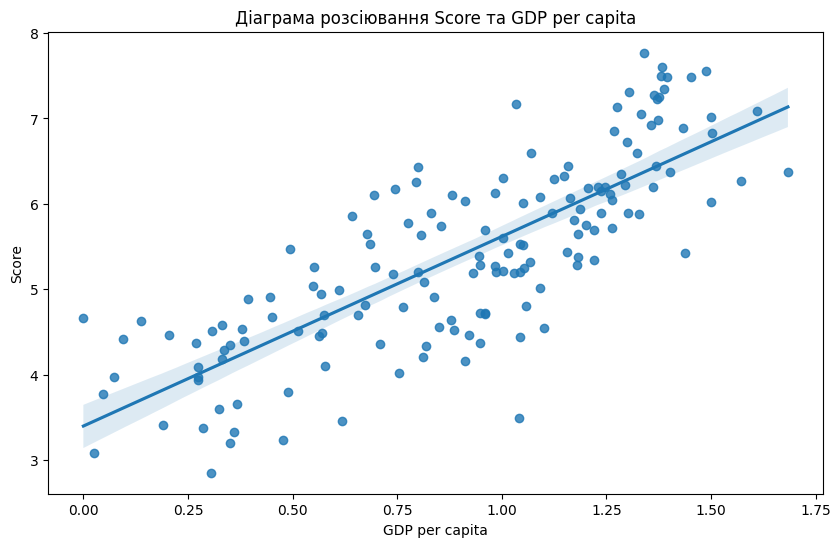

In [3]:
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP per capita', y='Score', data=df)

plt.title('Діаграма розсіювання Score та GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Score')

plt.show()

Ми моделюватимемо цю залежність. Тобто незалежною змінною є `GDP per capita`, залежною `Score`. Судячи з діаграми розсіювання, залежність між цими двома змінними має добре описуватись лінійною моделлю.

## Розв'язання задачі лінійної регресії методом градієнтного спуску

Позначення:
- `X` - матриця ознак
- `y` - цільова змінна
- `theta` - вектор параметрів
- `alpha` - темп навчання (learning rate)

3. Реалізуйте формулу передбачення лінійної регресії у методі `predict`. Метод повертає передбачення. Нагадаю, що для кожного спостереження з матриці ознак передбачення знаходимо за допомогою наступної формули:
$$x \in X, i \in [1,m], j : \\ \hat{y}_i = \theta_0 + \theta_1 x_1 + ... + \theta_n x_n = \theta^T x ,\\
\text{де m - кількість спостережень, } \\
\text{n - кількість ознак, } \\
x_0 = 1 \ \text{для всіх спостережень}.
$$

Передбачення всіх спостережень у матриці Х можемо знайти як множення матриці ознак на ваги.

In [4]:
def predict(X, theta):
    return X @ theta

4. Доповніть обчислення значення функції витрат, формула якої наведена в слайдах лекції про лінійну регресію (підказка - формула така сама, якби ми рахували середньоквадратичну помилку).  
Метод `cost()` приймає вектор параметрів `theta`, матрицю наших ознак `X` та реальні значення цільової змінної `y`.


In [5]:
def cost(y_true, y_estimate):
    m = len(y_true)
    return (1 / (2 * m)) * np.sum((y_estimate - y_true) ** 2)

5. Ознайомтеся з реалізацією методу `get_gradient()`, який повертає вектор часткових похідних функції витрат за кожним із параметрів лінійної регресії.
Доповніть метод `gradient_descent()`, який дозволить реалізувати алгоритм градієтного спуску. Під час градієнтного спуку ми оновлюємо параметри згідно з формулою:
$$
\text{для кожного} \ j \in [0, n]: \quad \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta), \\
\text{де n - кількість ознак}
$$
    
  Метод градієнтного спуску оновлює ваги (модель навчається) поки вони не перестануть змінюватися від ітерації до ітерації, тобто поки Евклідова відстань (звичайна відстань між веткорами, як у шкільній геометрії) між векторами ваг за останні дві ітерації не буде меншою за невелику константу (зазвичай позначається як $ \epsilon $ (епсілон), ми встановимо $\epsilon=10^{-6}$).

В `gradient_descent()` заповніть всі місця, де стоять три крапки. Використовуйте реалізовані у попередніх завданнях методи `cost()` та `predict()`, і звичайно ж Вам знадобиться метод `get_gradient()`.

In [6]:
def get_gradient(X, y, y_estimate):
    m = len(y)
    y_difference = (y_estimate - y).reshape(-1)
    gradient = (1.0 / m) * X.T @ y_difference
    return gradient

In [7]:
def gradient_descent(X, y, theta, learning_rate, eps, max_iterations):
    cost_history = []
    theta_history = []
    iterations = 1
    while True:
        y_estimate = predict(X, theta)  # Передбачення з поточними значеннями вагів
        gradient = get_gradient(X, y, y_estimate)  # Обчислення значення часткових похідних функції витрат
        cost_value = cost(y, y_estimate)  # Обчислення функції витрат
        cost_history.append(cost_value)
        
        new_theta = theta - learning_rate * gradient
        theta_history.append(new_theta)

        # Умова зупинки на основі функції витрат
        if cost_value < eps:
            print("Алгоритм зійшовся.")
            break

        # Умова зупинки на основі кількості ітерацій
        if iterations >= max_iterations:
            print("Досягнуто максимальної кількості ітерацій")
            break

        if iterations % 100 == 0:
            print ("Ітерація: %d - Помилка на трейн даних: %.4f" % (iterations, cost_value))

        iterations += 1
        theta = new_theta
    return theta, cost_history, theta_history, iterations

Підготуємо дані.

In [8]:
X = df['GDP per capita'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

y = y.reshape(-1)

6. Розділіть `X` та `y` на `train` і `test` підвиборки у співвідношенні 80/20. Оскільки у нас мало даних, валідаційну вибірку не виділятимемо. Запишіть результати у `X_train`, `y_train`, `X_test`, `y_test`.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Розмір X_train: {X_train.shape}, Розмір y_train: {y_train.shape}")
print(f"Розмір X_test: {X_test.shape}, Розмір y_test: {y_test.shape}")

Розмір X_train: (124, 1), Розмір y_train: (124,)
Розмір X_test: (32, 1), Розмір y_test: (32,)


7.Реалізуйте масштабування ознак із використанням `MinMaxScaler`. Пам'ятайте про те, як ми застосовуємо масштабування ознак на`train` та `test` вибірках.

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

print(f"Розмір X_train_scaled: {X_train_scaled.shape}")
print(f"Розмір X_test_scaled: {X_test_scaled.shape}")

Розмір X_train_scaled: (124, 1)
Розмір X_test_scaled: (32, 1)


8. Додайте колонку з одиниць до масивів `X_train`, `X_test`.

In [11]:
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

print(f"Розмір X_train_scaled: {X_train_scaled.shape}")
print(f"Розмір y_train: {y_train.shape}")
print(f"Розмір X_test_scaled: {X_test_scaled.shape}")
print(f"Розмір y_test: {y_test.shape}")

Розмір X_train_scaled: (124, 2)
Розмір y_train: (124,)
Розмір X_test_scaled: (32, 2)
Розмір y_test: (32,)


9. Встановіть темп навчання рівний 0.01, точність епсілон рівний $10^{-6}$, кількість ітерацій дорівнює 20000 і запустіть градієнтний спуск на тренувальні дані, передавши всі необхідні параметри.

In [12]:
theta_initial = np.zeros(X_train_scaled.shape[1])  
learning_rate = 0.01          
eps = 1e-6                    
max_iterations = 20000        


theta_optimal, cost_history, theta_history, num_iterations = gradient_descent(
    X_train_scaled, y_train, theta_initial, learning_rate, eps, max_iterations
)

print(f"Оптимальні параметри (θ): {theta_optimal}")
print(f"Кількість ітерацій: {num_iterations}")
print(f"Останнє значення функції витрат: {cost_history[-1]:.6f}")


Ітерація: 100 - Помилка на трейн даних: 1.3984
Ітерація: 200 - Помилка на трейн даних: 0.3516
Ітерація: 300 - Помилка на трейн даних: 0.2707
Ітерація: 400 - Помилка на трейн даних: 0.2612
Ітерація: 500 - Помилка на трейн даних: 0.2572
Ітерація: 600 - Помилка на трейн даних: 0.2539
Ітерація: 700 - Помилка на трейн даних: 0.2509
Ітерація: 800 - Помилка на трейн даних: 0.2483
Ітерація: 900 - Помилка на трейн даних: 0.2458
Ітерація: 1000 - Помилка на трейн даних: 0.2436
Ітерація: 1100 - Помилка на трейн даних: 0.2415
Ітерація: 1200 - Помилка на трейн даних: 0.2397
Ітерація: 1300 - Помилка на трейн даних: 0.2380
Ітерація: 1400 - Помилка на трейн даних: 0.2365
Ітерація: 1500 - Помилка на трейн даних: 0.2351
Ітерація: 1600 - Помилка на трейн даних: 0.2338
Ітерація: 1700 - Помилка на трейн даних: 0.2326
Ітерація: 1800 - Помилка на трейн даних: 0.2316
Ітерація: 1900 - Помилка на трейн даних: 0.2306
Ітерація: 2000 - Помилка на трейн даних: 0.2297
Ітерація: 2100 - Помилка на трейн даних: 0.2289
І

10. Відобразіть на лінійному графіку значення змінної `cost_history`. Використовуйте будь-яку бібліотеку для візуалізації на вибір.

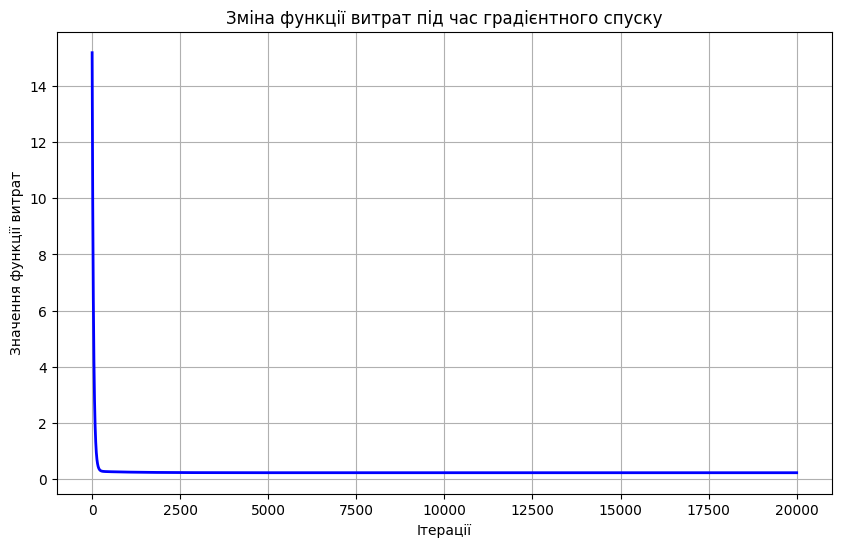

In [13]:
plt.figure(figsize=(10, 6))  
plt.plot(cost_history, color='blue', linewidth=2)
plt.title('Зміна функції витрат під час градієнтного спуску')
plt.xlabel('Ітерації')
plt.ylabel('Значення функції витрат')
plt.grid(True)  
plt.show()

Відобразіть лише перші 200 ітерацій. Схоже, що після них модель мало навчається. Ми могли б застосувати техніку early stopping у даному випадку та зупинитися на деякій невеликій кількості ітерацій. Зазвичай ця техніка застосовується, щоб уникнути перенавчання. При цьому втрачається трохи точності на train set.

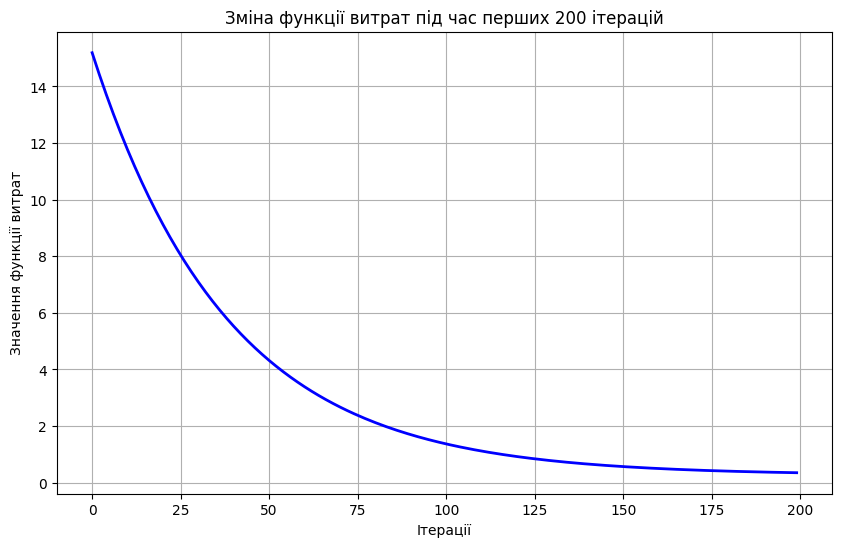

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(cost_history[:200], color='blue', linewidth=2)
plt.title('Зміна функції витрат під час перших 200 ітерацій')
plt.xlabel('Ітерації')
plt.ylabel('Значення функції витрат')
plt.grid(True)
plt.show()

Виведемо отримані параметри та останнє значення функції витрат.

In [23]:
print(f"Отримані параметри (θ): {theta_optimal}")

print(f"Останнє значення функції витрат: {cost_history[-1]:.6f}")


Отримані параметри (θ): [3.42123164 3.70972484]
Останнє значення функції витрат: 0.220861


11. Знайдіть прогнози на `X_train`, `X_test` та порахуйте `mean_squared_error` помилку прогнозів обох підвибірках.

In [26]:
y_train_pred = predict(X_train_scaled, theta_optimal)

y_test_pred = predict(X_test_scaled, theta_optimal)

mse_train = mean_squared_error(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Середньоквадратична помилка (MSE) на тренувальній вибірці: {mse_train:.6f}")
print(f"Середньоквадратична помилка (MSE) на тестовій вибірці: {mse_test:.6f}")


Середньоквадратична помилка (MSE) на тренувальній вибірці: 0.441721
Середньоквадратична помилка (MSE) на тестовій вибірці: 0.507913


12. Виведіть діаграму розсіювання ознак `Score` та `GDP per capita` та додайте лінію прогнозу моделі.

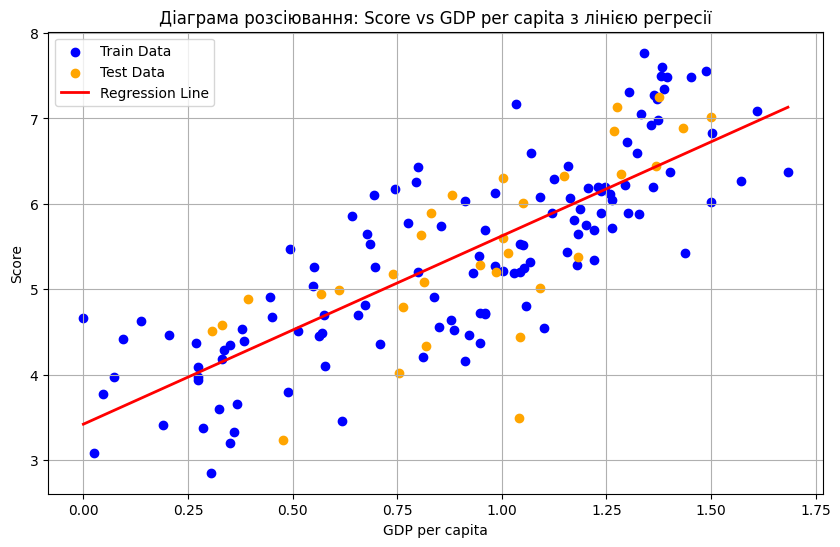

In [27]:
X_train_original = scaler.inverse_transform(X_train_scaled)[:, 1] 
X_test_original = scaler.inverse_transform(X_test_scaled)[:, 1]

y_train_pred = predict(X_train_scaled, theta_optimal)
y_test_pred = predict(X_test_scaled, theta_optimal)

plt.figure(figsize=(10, 6))  
plt.scatter(X_train_original, y_train, color='blue', label='Train Data')  
plt.scatter(X_test_original, y_test, color='orange', label='Test Data')  

X_full_original = np.concatenate((X_train_original, X_test_original))
X_full_scaled = np.concatenate((X_train_scaled, X_test_scaled))

sort_idx = np.argsort(X_full_original)
X_full_sorted = X_full_original[sort_idx]
y_full_pred_sorted = predict(X_full_scaled, theta_optimal)[sort_idx]

plt.plot(X_full_sorted, y_full_pred_sorted, color='red', linewidth=2, label='Regression Line')

plt.title('Діаграма розсіювання: Score vs GDP per capita з лінією регресії')
plt.xlabel('GDP per capita')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


13. Навчіть лінійну регресію на наборі даних, що складається тільки з ознаки `GDP per capita`, але тепер використовуючи LinearRegression з sklearn.   
Подумайте, чи треба в sklearn модель подавати стовпчик з одиниць, яку ми подавали в самописну модель.

In [29]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

intercept = regressor.intercept_  
coefficients = regressor.coef_   

print(f"Отримані параметри лінійної регресії:")
print(f"Вільний член (intercept, θ_0): {intercept:.6f}")
print(f"Коефіцієнт (θ_1): {coefficients[0]:.6f}")

y_train_pred_sklearn = regressor.predict(X_train)
y_test_pred_sklearn = regressor.predict(X_test)

mse_train_sklearn = mean_squared_error(y_train, y_train_pred_sklearn)
mse_test_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)

print(f"Середньоквадратична помилка (MSE) на тренувальній вибірці (sklearn): {mse_train_sklearn:.6f}")
print(f"Середньоквадратична помилка (MSE) на тестовій вибірці (sklearn): {mse_test_sklearn:.6f}")


Отримані параметри лінійної регресії:
Вільний член (intercept, θ_0): 3.421168
Коефіцієнт (θ_1): 2.202993
Середньоквадратична помилка (MSE) на тренувальній вибірці (sklearn): 0.441721
Середньоквадратична помилка (MSE) на тестовій вибірці (sklearn): 0.507911


Ваша відповідь: Ні, у моделі LinearRegression з sklearn не потрібно додавати стовпчик з одиниць. Модель LinearRegression автоматично враховує вільний член

Порівняйте помилку на тестовій вибірці лінійної регресії, написаної вами, та зі sklearn. Чи є різниця у значеннях?

In [30]:
y_train_pred_custom = predict(X_train_scaled, theta_optimal)
y_test_pred_custom = predict(X_test_scaled, theta_optimal)

mse_train_custom = mean_squared_error(y_train, y_train_pred_custom)
mse_test_custom = mean_squared_error(y_test, y_test_pred_custom)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_train_pred_sklearn = regressor.predict(X_train)
y_test_pred_sklearn = regressor.predict(X_test)

mse_train_sklearn = mean_squared_error(y_train, y_train_pred_sklearn)
mse_test_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)

print(f"Середньоквадратична помилка (MSE) на тренувальній вибірці для власної реалізації: {mse_train_custom:.6f}")
print(f"Середньоквадратична помилка (MSE) на тестовій вибірці для власної реалізації: {mse_test_custom:.6f}")
print(f"Середньоквадратична помилка (MSE) на тренувальній вибірці для sklearn: {mse_train_sklearn:.6f}")
print(f"Середньоквадратична помилка (MSE) на тестовій вибірці для sklearn: {mse_test_sklearn:.6f}")

difference_test_mse = abs(mse_test_custom - mse_test_sklearn)
print(f"Різниця у значеннях MSE на тестовій вибірці між власною реалізацією та sklearn: {difference_test_mse:.6f}")


Середньоквадратична помилка (MSE) на тренувальній вибірці для власної реалізації: 0.441721
Середньоквадратична помилка (MSE) на тестовій вибірці для власної реалізації: 0.507913
Середньоквадратична помилка (MSE) на тренувальній вибірці для sklearn: 0.441721
Середньоквадратична помилка (MSE) на тестовій вибірці для sklearn: 0.507911
Різниця у значеннях MSE на тестовій вибірці між власною реалізацією та sklearn: 0.000002


Ваша відповідь: алгоритм лінійної регресії можна вважати правильно реалізованим, оскільки він дає результати, дуже близькі до стандартної реалізації з sklearn. Успішно поовторена поведінка моделі sklearn, що підтверджується практично ідентичними значеннями середньоквадратичної помилки.

14. Навчимо лінійну регресію на більшій кількості ознак і подивимося, чи вдасться покращити модель.

14.1 Навчіть лінійну регресію з sklearn використовуючи як набор ознак наступний: `GDP per capita`, `Social support`, `Healthy life expectancy`, `Freedom to make life choices`, `Generosity`, `Perceptions of corruption`

Не забудьте:  
1. Розділити `train` та `test`.
2. Нормувати кожну колонку даних.

In [35]:
features = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]

X = df[features].values  
y = df['Score'].values  

X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)       

regressor = LinearRegression()

regressor.fit(X_train_scaled, y_train)

y_train_pred = regressor.predict(X_train_scaled)
y_test_pred = regressor.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Параметри моделі (коефіцієнти): {regressor.coef_}")
print(f"Вільний член (intercept): {regressor.intercept_}")
print(f"Середньоквадратична помилка (MSE) на тренувальній вибірці: {mse_train:.6f}")
print(f"Середньоквадратична помилка (MSE) на тестовій вибірці: {mse_test:.6f}")

Параметри моделі (коефіцієнти): [1.26420675 2.00129534 1.06220807 0.94007222 0.15303419 0.50393133]
Вільний член (intercept): 1.8115122981234264
Середньоквадратична помилка (MSE) на тренувальній вибірці: 0.236470
Середньоквадратична помилка (MSE) на тестовій вибірці: 0.414464


14.2 Виведіть помилку прогнозу на `train` та `test` вибірках. Порівняйте з результатом, отриманим під час навчання однією ознакою. Чи змінилися метрики?

In [36]:
X_single = df['GDP per capita'].values.reshape(-1, 1)
y_single = df['Score'].values.reshape(-1, 1)

X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y_single, test_size=0.2, random_state=42)

scaler_single = MinMaxScaler()
X_train_single_scaled = scaler_single.fit_transform(X_train_single)
X_test_single_scaled = scaler_single.transform(X_test_single)

model_single = LinearRegression()
model_single.fit(X_train_single_scaled, y_train_single)

y_train_single_pred = model_single.predict(X_train_single_scaled)
y_test_single_pred = model_single.predict(X_test_single_scaled)

mse_train_single = mean_squared_error(y_train_single, y_train_single_pred)
mse_test_single = mean_squared_error(y_test_single, y_test_single_pred)

print("MSE на тренувальній вибірці (одна ознака):", mse_train_single)
print("MSE на тестовій вибірці (одна ознака):", mse_test_single)

print("MSE на тренувальній вибірці (кілька ознак):", mse_train)
print("MSE на тестовій вибірці (кілька ознак):", mse_test)

print("\nПорівняння MSE:")
print(f"Тренувальна вибірка (одна ознака): {mse_train_single}, Кілька ознак: {mse_train}")
print(f"Тестова вибірка (одна ознака): {mse_test_single}, Кілька ознак: {mse_test}")


MSE на тренувальній вибірці (одна ознака): 0.44172119231185786
MSE на тестовій вибірці (одна ознака): 0.5079112698997723
MSE на тренувальній вибірці (кілька ознак): 0.2364699215592196
MSE на тестовій вибірці (кілька ознак): 0.41446413835283513

Порівняння MSE:
Тренувальна вибірка (одна ознака): 0.44172119231185786, Кілька ознак: 0.2364699215592196
Тестова вибірка (одна ознака): 0.5079112698997723, Кілька ознак: 0.41446413835283513


Ваша відповідь: додавання кількох ознак значно зменшило середньоквадратичну помилку як на тренувальній, так і на тестовій вибірках, що свідчить про кращу якість моделі. Використання кількох ознак дозволяє моделі захопити більше інформації про залежність цільової змінної, що призводить до покращення якості передбачення.

14.3 Виведіть коефіцієнти моделі і визначте, які ознаки мають найбільші коефіцієнти по модулю, що стоять перед ними (достатньо вивести назви ознак і коефіцієнти в одному датафреймі).

In [37]:
X = df[features].values
y = df['Score'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

coefficients = model.coef_[0]
intercept = model.intercept_[0]

coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()

coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

print(coef_df[['Feature', 'Coefficient']])

                        Feature  Coefficient
1                Social support     2.001295
0                GDP per capita     1.264207
2       Healthy life expectancy     1.062208
3  Freedom to make life choices     0.940072
5     Perceptions of corruption     0.503931
4                    Generosity     0.153034


15. Навчіть модель поліноміальної регресії зі ступенем 2 на тих самих даних, що й у попередньому пункті. Використовуйте у процесі навчання `PolynomialFeatures`. Дослідіть метрики якості на трейні та тест датасетах. Чи є перенавчання (overfit)?

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

y_train_pred = model_poly.predict(X_train_poly)
y_test_pred = model_poly.predict(X_test_poly)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'MSE на тренувальній вибірці (поліноміальна регресія): {train_mse}')
print(f'MSE на тестовій вибірці (поліноміальна регресія): {test_mse}')

MSE на тренувальній вибірці (поліноміальна регресія): 0.20939842080393145
MSE на тестовій вибірці (поліноміальна регресія): 0.38144381359863283


Ваша відповідь: виходячи з наведених метрик, можна стверджувати, що у моделі присутнє перенавчання.
Модель показує дуже низьку помилку на тренувальних даних, але має значно більшу помилку на тестових даних.
Це свідчить про те, що модель надто добре підлаштувалася під тренувальні дані, враховуючи навіть шум, і не здатна ефективно узагальнювати свої передбачення на нових даних.

16. Зробіть пайплайн із кроками `MinMaxScaler`, `PolynomialFeatures` та `ElasticNet`.

Яка модель у домашньому завданні дала найкращі значення середньоквадратичної помилки на тестових даних, лін. регресія написана самостійно, лін. регресія зі sklearn, поліноміальна регресія?

In [39]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),               
    ('poly', PolynomialFeatures(degree=2)),   
    ('elasticnet', ElasticNet(alpha=1.0))    
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'MSE на тренувальній вибірці (пайплайн ElasticNet): {train_mse}')
print(f'MSE на тестовій вибірці (пайплайн ElasticNet): {test_mse}')

MSE на тренувальній вибірці (пайплайн ElasticNet): 1.2794603680411027
MSE на тестовій вибірці (пайплайн ElasticNet): 1.0444315956685744


Ваша відповідь: найнижче значення середньоквадратичної помилки на тестових даних показала поліноміальна регресія другого ступеня з MSE = 0.3814. Вона перевершила всі інші моделі, включаючи як власну реалізацію лінійної регресії, так і модель LinearRegression зі sklearn, у цьому конкретному завданні.